In [7]:
import torch
import numpy as np
import cv2
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

---------------------------------------------------- этап 1 (загружаем картинку-поле) ----------------------------------------------------

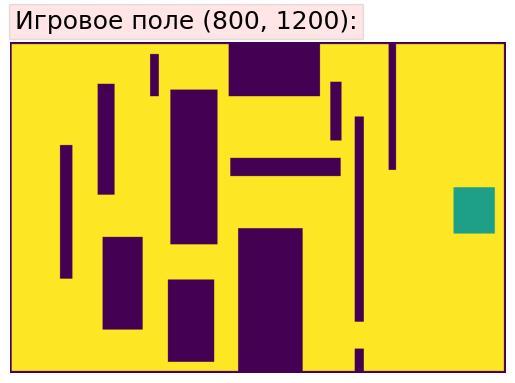

In [108]:
# загружаем картинку (картинка должна быть латиницей):
pic = cv2.imread('Labirint.png', 0) #.transpose(-1,0,1)
# смотрим картинку:
f, ax = plt.subplots()
plt.imshow(pic)
plt.axis('off')
plt.text(.01, +1.1, f'Игровое поле {pic.shape}:', ha='left', va='top',fontsize=18, transform=ax.transAxes, bbox={"facecolor":"r", "alpha":0.1})
plt.show()

In [109]:
print(pic)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [130]:
# открытие картинка в отдельном окне
cv2.imshow('image',pic)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [155]:
# изменение размера картинки
# pic = pic.transpose(-1,0,1) # меняем каналы с (800, 1200, 3) на (3, 800, 1200)
print(pic.shape)
label_mask_real_size = cv2.resize(pic, (300, 200), interpolation=cv2.INTER_NEAREST)
label_mask_real_size


(800, 1200)


array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(200, 300), dtype=uint8)

In [156]:
label_mask_real_size[100]

array([  0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

In [157]:
# добавили агента, но он маленький совсем))))
label_mask_real_size[100][12] = 60


In [162]:
# смотрим измененную картинку
res = cv2.resize(label_mask_real_size, dsize=(600,400), interpolation=cv2.INTER_CUBIC)
# cv2.namedWindow("Resized", cv2.WINDOW_NORMAL)
cv2.imshow('image',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [160]:
# проверяем значения в матрице, нужно, чтобы их не было больше, или меньше, чем нужно
h = []
for i in label_mask_real_size:
    # print(set(i))
    for _ in i: 
        if _ not in h:
            h.append(_)
print([int(j) for j in h])



[0, 255, 144, 60]


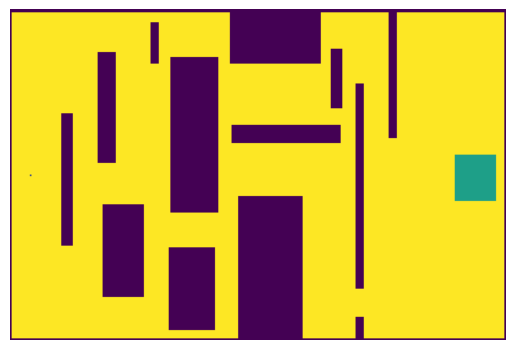

In [163]:
plt.imshow(label_mask_real_size)
plt.axis('off')
# plt.text(.01, +1.1, f'Игровое поле {pic.shape}:', ha='left', va='top',fontsize=18, transform=ax.transAxes, bbox={"facecolor":"r", "alpha":0.1})
plt.show()

In [168]:
label_mask_real_size

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       ...,
       [  0, 255, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [  0,   0,   0, ...,   0,   0,   0]], shape=(200, 300), dtype=uint8)

In [ ]:
# переводим цифры в буквы по словарю
area = []
dct = {0: 'H', 60: 'S', 144: 'G', 255: 'F'}
for i in label_mask_real_size:
    # print(f'i:{len(i)}')
    fox = ''.join([dct[_] for _ in i])
    # print(len(fox))
    
    area.append(fox)
print(len(area))

200


In [178]:
# проверяем значения в матрице, нужно, чтобы их не было больше, или меньше, чем нужно
h = []
for i in area:
    # print(set(i))
    for _ in i: 
        if _ not in h:
            h.append(_)
print(h)

['H', 'F', 'G', 'S']


In [ ]:
# записываем таблицу в файл area.txt
with open('area.txt', 'w+') as f:
    
    # write elements of list
    for items in area:
        f.write('%s\n' %items)
    
    print("File written successfully")

File written successfully


# ***Результирующая картинка для подачи в модель area***

---------------------------------------------------- этап 2 ----------------------------------------------------

In [5]:
gym.pprint_registry()

===== classic_control =====
Acrobot-v1             CartPole-v0            CartPole-v1
MountainCar-v0         MountainCarContinuous-v0 Pendulum-v1
===== phys2d =====
phys2d/CartPole-v0     phys2d/CartPole-v1     phys2d/Pendulum-v0
===== box2d =====
BipedalWalker-v3       BipedalWalkerHardcore-v3 CarRacing-v3
LunarLander-v3         LunarLanderContinuous-v3
===== toy_text =====
Blackjack-v1           CliffWalking-v0        FrozenLake-v1
FrozenLake8x8-v1       Taxi-v3
===== tabular =====
tabular/Blackjack-v0   tabular/CliffWalking-v0
===== mujoco =====
Ant-v2                 Ant-v3                 Ant-v4
Ant-v5                 HalfCheetah-v2         HalfCheetah-v3
HalfCheetah-v4         HalfCheetah-v5         Hopper-v2
Hopper-v3              Hopper-v4              Hopper-v5
Humanoid-v2            Humanoid-v3            Humanoid-v4
Humanoid-v5            HumanoidStandup-v2     HumanoidStandup-v4
HumanoidStandup-v5     InvertedDoublePendulum-v2 InvertedDoublePendulum-v4
InvertedDoublePendulu

In [6]:
import gymnasium as gym
gym.make('CliffWalking-v0')

<OrderEnforcing<PassiveEnvChecker<CliffWalkingEnv<CliffWalking-v0>>>>